### Импорт библиотек

In [193]:
import pandas as pd
pd.set_option("display.max_columns", 350)
pd.options.display.float_format = '{:,.2f}'.format

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#import seaborn as sns
import vk
import numpy as np
import sys

### Настройка модуля для API vk.com

In [3]:
vk_login = '###';
vk_password = '###';
app_id = '###';
vk_private_key = '###';
vk_service_key = '###';

session = vk.AuthSession(app_id=app_id, user_login=vk_login, user_password=vk_password, access_token=vk_service_key);
vkapi = vk.API(session, v='5.78', lang='ru', timeout=1000)

if (vkapi.users.get(user_id=1)):
    print ('Авторизация пройдена успешно')
else:
    print ('При авторизации возникла ошибка, проверь данные из блока Авторизация')

Авторизация пройдена успешно


### Импорт данных

In [4]:
df1 = pd.read_csv('normalized_input_data.csv', engine='python', index_col='Unnamed: 0')
df1.drop_duplicates('id', inplace=True)

In [5]:
df2 = pd.read_csv('Y_class.csv', engine='python', index_col='Unnamed: 0')
df2.drop_duplicates('id', inplace=True)

In [6]:
df1.head(5), df2.head(5);

### Разделим все признаки на категориальные и количественные

In [7]:
df1_categorical_columns = [c for c in df1.columns if df1[c].dtype.name == 'object']
df1_numerical_columns   = [c for c in df1.columns if df1[c].dtype.name != 'object']

df2_categorical_columns = [c for c in df2.columns if df2[c].dtype.name == 'object']
df2_numerical_columns   = [c for c in df2.columns if df2[c].dtype.name != 'object']

### Добавим несколько бинарных перменных

In [8]:
df1['about_isFilled'] = df1['about'].notnull()
df1['activities_isFilled'] = df1['activities'].notnull()
df1['books_isFilled'] = df1['books'].notnull()
df1['games_isFilled'] = df1['games'].notnull()
df1['interests_isFilled'] = df1['interests'].notnull()
df1['movies_isFilled'] = df1['movies'].notnull()
df1['music_isFilled'] = df1['music'].notnull()
df1['quotes_isFilled'] = df1['quotes'].notnull()
df1['tv_isFilled'] = df1['tv'].notnull()
df1['status_isFilled'] = df1['status'].notnull()
df1['hasNickname'] = df1['nickname'].notnull()
df1['has_Facebook'] = df1['facebook_name'].notnull()

df2['about_isFilled'] = df2['about'].notnull()
df2['activities_isFilled'] = df2['activities'].notnull()
df2['books_isFilled'] = df2['books'].notnull()
df2['games_isFilled'] = df2['games'].notnull()
df2['interests_isFilled'] = df2['interests'].notnull()
df2['movies_isFilled'] = df2['movies'].notnull()
df2['music_isFilled'] = df2['music'].notnull()
df2['quotes_isFilled'] = df2['quotes'].notnull()
df2['tv_isFilled'] = df2['tv'].notnull()
df2['status_isFilled'] = df2['status'].notnull()
df2['hasNickname'] = df2['nickname'].notnull()
df2['has_Facebook'] = df2['facebook_name'].notnull()

### В DF1 добавим переменную `target`, все значения для нее будут = 0

In [9]:
df1['target']=0;

### Анализируем пропуски в DFs

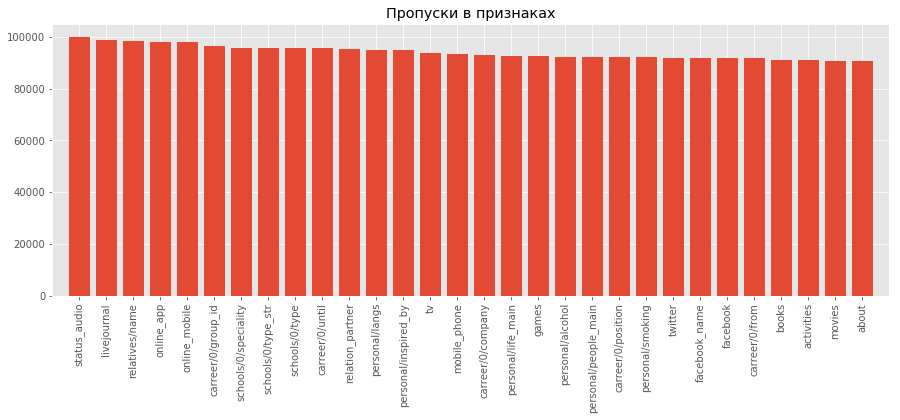

In [10]:
#DF1
missings = df1.isnull().sum().sort_values(ascending = False)
d_first = 30
plt.figure(figsize=(15, 5))
plt.title("Пропуски в признаках")
plt.bar(range(d_first), missings[:d_first], align='center')
plt.xticks(range(d_first), missings.index[:d_first], rotation=90,)
plt.xlim([-1, d_first]);
plt.savefig('graphics/missings_df1.png')
del(d_first, missings)

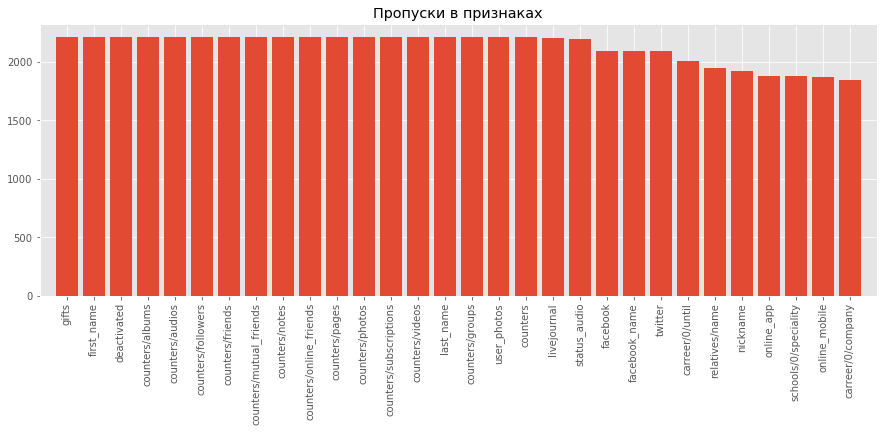

In [11]:
#DF2
missings = df2.isnull().sum().sort_values(ascending = False)
d_first = 30
plt.figure(figsize=(15, 5))
plt.title("Пропуски в признаках")
plt.bar(range(d_first), missings[:d_first], align='center')
plt.xticks(range(d_first), missings.index[:d_first], rotation=90,)
plt.xlim([-1, d_first]);
plt.savefig('graphics/missings_df2.png')
del(d_first, missings)

### Чистим данные в DF1

In [12]:
df1.dropna(axis = 0, subset = ['id', 'has_photo', 'online', 'followers_count', 'has_mobile', 'sex', 'verified'
                              ,'last_seen/time', 'last_seen/platform'], inplace=True)

In [13]:
#Устанавливаем для пропущенных значений категориальных полей
#значение 0, чтобы алгоритм мог их обрабатывать
df1['carreer/0/city_id'] = df1['carreer/0/city_id'].fillna(0).astype(int)
df1['carreer/0/group_id'] = df1['carreer/0/group_id'].fillna(0).astype(int)
df1['carreer/0/country_id'] = df1['carreer/0/country_id'].fillna(0).astype(int)

df1['universities/0/city'] = df1['universities/0/city'].fillna(0)
df1['universities/0/country'] = df1['universities/0/country'].fillna(0)
df1['schools/0/city'] = df1['schools/0/city'].fillna(0)
df1['schools/0/country'] = df1['schools/0/country'].fillna(0)
df1['city/id'] = df1['city/id'].fillna(0).astype(int)
df1['country/id']=df1['country/id'].fillna(0).astype(int)

In [14]:
#Для пустых значений occupation/type стиавим значение none
df1['occupation/type'] = df1['occupation/type'].fillna('none')
df1['occupation/type'].isnull().sum();

In [15]:
#Значение поля education_form для пустых заполняем значением Не указано
df1['education_form'] = df1['education_form'].fillna('Не указано');
df1['education_status'] = df1['education_status'].fillna('Не указано');

In [16]:
#Для признако с ID университетов и школ, пропуски запишем как 0
#Возможнно, они будут dropped потом, однако предобработку сделаем
df1['university'] = df1['university'].fillna(0)
df1['schools/0/id'] = df1['schools/0/id'].fillna(0)

In [17]:
#Для personal/political для пустых значений заполняем 0
#Для бракованных значений также ставим 0
df1.loc[df1[df1['personal/political']=='9999.0'].index, 'personal/political']=np.nan
df1['personal/political'] = df1['personal/political'].fillna(0)

#1 — коммунистические;
#2 — социалистические;
#3 — умеренные;
#4 — либеральные;
#5 — консервативные;
#6 — монархические;
#7 — ультраконсервативные;
#8 — индифферентные;
#9 — либертарианские.

In [18]:
#Для personal/smoking ставим 0 для пустых
df1['personal/smoking'] = df1['personal/smoking'].fillna(0)

#1 — резко негативное;
#2 — негативное;
#3 — компромиссное;
#4 — нейтральное;
#5 — положительное.

In [19]:
#Для пустых значений personal/people_main ставим значение 0
df1['personal/alcohol'] = df1['personal/alcohol'].fillna(0)


#1 — ум и креативность;
#2 — доброта и честность;
#3 — красота и здоровье;
#4 — власть и богатство;
#5 — смелость и упорство;
#6 — юмор и жизнелюбие.

In [20]:
#Аналогично остальным personal..
df1['personal/people_main'] = df1['personal/people_main'].fillna(0)

#1 — резко негативное;
#2 — негативное;
#3 — компромиссное;
#4 — нейтральное;
#5 — положительное.

In [21]:
#Аналогично остальным personal..
df1['personal/life_main'] = df1['personal/life_main'].fillna(0)


#1 — семья и дети;
#2 — карьера и деньги;
#3 — развлечения и отдых;
#4 — наука и исследования;
#5 — совершенствование мира;
#6 — саморазвитие;
#7 — красота и искусство;
#8 — слава и влияние;

In [22]:
#Кодируем поле education_status
education_cats ={'Не указано':0,
                 'Абитуриент' : 10, 
                 'Абитуриентка' : 10, 
                 'Студент (специалист)' : 3, 
                 'Студентка (специалист)' : 3,
                 'Выпускник (специалист)' : 2, 
                 'Выпускница (специалист)' : 2, 
                 'Студент (бакалавр)' : 8, 
                 'Студентка (бакалавр)' : 8, 
                 'Выпускник (бакалавр)' : 1, 
                 'Выпускница (бакалавр)' : 1, 
                 'Студент (магистр)' : 9, 
                 'Студентка (магистр)' : 9, 
                 'Выпускник (магистр)' : 7, 
                 'Выпускница (магистр)' : 7,
                 'Аспирант' : 4, 
                 'Аспирантка' : 4, 
                 'Интерн' : 11, 
                 'Соискатель' : 12, 
                 'Доктор наук' : 5, 
                 'Кандидат наук' : 6, 
                 'Докторант' : 13}
df1['coded_ed_status'] = df1['education_status'].replace(education_cats);

In [23]:
#Кодируем значения поля education_form
education_form_cats = {'Не указано':0,
                       'Очное отделение':1,
                       'Заочное отделение':2,
                       'Очно-заочное отделение':3,
                       'Дистанционное обучение':4, 
                       'Экстернат':5}
df1['coded_ed_form']  = df1['education_form'].replace(education_form_cats)

In [24]:
#Кодируем значение поля occupation_type
occupation_type_cats = {'university':2,
                        'work':3,
                        'none':0,
                        'school':1}
df1['coded_occupation_type'] = df1['occupation/type'].replace(occupation_type_cats)

In [25]:
#Проверяем на шум важные признаки
df1['sex'].value_counts();

#1 - женщины
#2 - мужчины

In [26]:
df1['last_seen/platform'].isnull().sum()

0

In [27]:
df1['relation'].value_counts()
#1 — не женат/не замужем;
#2 — есть друг/есть подруга;
#3 — помолвлен/помолвлена;
#4 — женат/замужем;
#5 — всё сложно;
#6 — в активном поиске;
#7 — влюблён/влюблена;
#8 — в гражданском браке;
#0 — не указано. 

#Заменяем ШУМ
df1.loc[df1[df1['relation']==-99].index, 'relation']=np.nan

#Заменяем пропуски на значение 0 – не указано
df1['relation'] = df1['relation'].fillna(0).astype(int)
df1['relation'].isnull().sum();

In [28]:
must_be_drop = ['country/title', 'city/title', 'occupation/name', 'occupation/id', 'status', 'site', 'skype',
                'faculty', 'graduation', 'nickname', 'home_town', 'schools/0/name', 'universities/0/name',
                'university_name', 'universities/0/faculty_name', 'faculty_name', 'instagram', 'universities/0/graduation',
                'schools/0/year_to', 'schools/0/year_from', 'schools/0/year_graduated','universities/0/chair_name',
                'universities/0/chair', 'schools/0/class', 'twitter', 'relatives/id', 'facebook', 'facebook_name',
                'carreer/0/from', 'carreer/0/position', 'carreer/0/company', 'mobile_phone', 'relation_partner',
                'carreer/0/until', 'schools/0/type_str', 'schools/0/type', 'schools/0/speciality', 'online_mobile',
                'online_app', 'relatives/name', 'livejournal', 'status_audio', 'bdate/day', 'bdate/month', 'bdate/year',
                'common_count', 'counters', 'counters/albums', 'counters/audios', 'counters/followers', 'counters/friends',
                'counters/groups', 'counters/mutual_friends', 'counters/notes', 'counters/online_friends', 'counters/pages',
                'counters/photos', 'counters/subscriptions', 'counters/videos', 'gifts', 'user_photos', 'deactivated',
                'first_name', 'last_name', 'norm_interests', 'online', 'universities/0/faculty', 'schools/0/id',
                'university', 'universities/0/id','carreer/0/group_id'
               ]

#Изучить и заполнить пропуски
might_be_drop =['university', 'schools/0/id', 'universities/0/id', 'universities/0/faculty', 
                'universities/0/education_form', 'universities/0/education_status', 'relatives/type' 
               ]

#Для анализа с помощью nltk
for_nltk = ['quotes', 'personal/religion', 'interests', 'music', 'about', 'movies', 'activities', 'books',
           'games','tv', 'personal/inspired_by', 'personal/langs'
           ]

### Добавим признак `zodiac_sign` и `age`

In [29]:
import os
from datetime import date

def get_zodiac_sign (Day, Month, Year):
    d = date.today()
    y = d.year
    zodiac_sign = '';
    if (np.isnan(Year)!= True):
        age = y - int(Year)
    else:
        age = np.nan;

    if (np.isnan(Month) == True or np.isnan(Day) == True):
            zodiac_sign = np.nan
    elif ((int(Month)==12 and int(Day) >= 22)or(int(Month)==1 and int(Day)<= 19)):
            zodiac_sign = ("Козерог")
    elif ((int(Month)==1 and int(Day) >= 20)or(int(Month)==2 and int(Day)<= 17)):
            zodiac_sign = ("Водолей")
    elif ((int(Month)==2 and int(Day) >= 18)or(int(Month)==3 and int(Day)<= 19)):
            zodiac_sign = ("Рыбы")
    elif ((int(Month)==3 and int(Day) >= 20)or(int(Month)==4 and int(Day)<= 19)):
            zodiac_sign = ("Овен")
    elif ((int(Month)==4 and int(Day) >= 20)or(int(Month)==5 and int(Day)<= 20)):
            zodiac_sign = ("Телец")
    elif ((int(Month)==5 and int(Day) >= 21)or(int(Month)==6 and int(Day)<= 20)):
            zodiac_sign = ("Близнецы")
    elif ((int(Month)==6 and int(Day) >= 21)or(int(Month)==7 and int(Day)<= 22)):
            zodiac_sign = ("Рак")
    elif ((int(Month)==7 and int(Day) >= 23)or(int(Month)==8 and int(Day)<= 22)): 
            zodiac_sign = ("Лев")
    elif ((int(Month)==8 and int(Day) >= 23)or(int(Month)==9 and int(Day)<= 22)): 
            zodiac_sign = ("Дева")
    elif ((int(Month)==9 and int(Day) >= 23)or(int(Month)==10 and int(Day)<= 22)):
            zodiac_sign = ("Весы")
    elif ((int(Month)==10 and int(Day) >= 23)or(int(Month)==11 and int(Day)<= 21)): 
            zodiac_sign = ("Скорпион")
    elif ((int(Month)==11 and int(Day) >= 22)or(int(Month)==12 and int(Day)<= 21)):
            zodiac_sign = ("Стрелец")
    

    return zodiac_sign, age;

### Инициация функции

In [30]:
for index in df1[['bdate/day', 'bdate/month', 'bdate/year']].index:
    df1.loc[index, ('zodiac_sign')] = get_zodiac_sign(df1.loc[index]['bdate/day'], df1.loc[index]['bdate/month'], df1.loc[index]['bdate/year'])[0]
    df1.loc[index, ('age')] = get_zodiac_sign(df1.loc[index]['bdate/day'], df1.loc[index]['bdate/month'], df1.loc[index]['bdate/year'])[1]
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


### Закодируем полученные знаки зодиака

In [31]:
zodiac_signs_cats = dict.fromkeys(df1['zodiac_sign'].unique())
i=1
for item in zodiac_signs_cats:
    zodiac_signs_cats[item] = i
    i=i+1
    
zodiac_signs_cats[np.nan]=0
df1['coded_zodiac_sign'] = df1['zodiac_sign'].replace(zodiac_signs_cats)
df1['zodiac_sign'] = df1['zodiac_sign'].fillna('Не указано')

## Объединим два исходных DF

In [32]:
df1.shape, df2.shape

((93767, 112), (2214, 125))

In [33]:
df = pd.concat([df1, df2], axis=0, ignore_index = True)

In [34]:
df.drop_duplicates(subset='id', keep='last', inplace = True)

In [35]:
df[df['target']==0].shape, df[df['target']==1].shape

((93767, 131), (2214, 131))

In [36]:
df.head()

,about,about_isFilled,activities,activities_isFilled,age,bdate/day,bdate/month,bdate/year,books,books_isFilled,carreer/0/city_id,carreer/0/company,carreer/0/country_id,carreer/0/from,carreer/0/group_id,carreer/0/position,carreer/0/until,city/id,city/title,coded_ed_form,coded_ed_status,coded_occupation_type,coded_zodiac_sign,common_count,counters,counters/albums,counters/audios,counters/followers,counters/friends,counters/groups,counters/mutual_friends,counters/notes,counters/online_friends,counters/pages,counters/photos,counters/subscriptions,counters/videos,country/id,country/title,deactivated,education_form,education_status,facebook,facebook_name,faculty,faculty_name,first_name,followers_count,games,games_isFilled,gifts,graduation,hasNickname,has_Facebook,has_mobile,has_photo,home_town,id,instagram,interests,interests_isFilled,last_name,last_seen/platform,last_seen/time,livejournal,mobile_phone,movies,movies_isFilled,music,music_isFilled,nickname,norm_interests,occupation/id,occupation/name,occupation/type,online,online_app,online_mobile,personal/alcohol,personal/inspired_by,personal/langs,personal/life_main,personal/people_main,personal/political,personal/religion,personal/smoking,quotes,quotes_isFilled,relation,relation_partner,relatives/id,relatives/name,relatives/type,schools/0/city,schools/0/class,schools/0/country,schools/0/id,schools/0/name,schools/0/speciality,schools/0/type,schools/0/type_str,schools/0/year_from,schools/0/year_graduated,schools/0/year_to,sex,site,skype,status,status_audio,status_isFilled,target,tv,tv_isFilled,twitter,universities/0/chair,universities/0/chair_name,universities/0/city,universities/0/country,universities/0/education_form,universities/0/education_status,universities/0/faculty,universities/0/faculty_name,universities/0/graduation,universities/0/id,universities/0/name,university,university_name,user_photos,verified,wall_comments,zodiac_sign
0,NaN,False,NaN,False,nan,18,11,nan,NaN,False,0,NaN,0,nan,0,NaN,nan,1,Москва,0,0,3,1,0.0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,Россия,NaN,Не указано,Не указано,NaN,NaN,NaN,NaN,NaN,32047.0,NaN,False,nan,NaN,False,False,1.0,1,NaN,5,NaN,NaN,False,NaN,2,"1,526,767,236",NaN,NaN,NaN,False,NaN,False,NaN,NaN,nan,"ООО ""В Контакте""",work,0,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,False,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,nan,NaN,nan,nan,NaN,2,http://twitter.com/#!/perekopsky,NaN,NaN,NaN,False,0,NaN,False,perekopsky,NaN,NaN,0,0,NaN,NaN,NaN,NaN,nan,nan,NaN,0,NaN,nan,0.0,1.0,Скорпион
1,NaN,False,NaN,False,nan,nan,nan,nan,NaN,False,0,NaN,0,nan,0,NaN,nan,2,Санкт-Петербург,0,0,2,0,0.0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,Россия,NaN,Не указано,Не указано,NaN,NaN,NaN,NaN,NaN,55695.0,NaN,False,nan,NaN,False,False,1.0,1,NaN,6,NaN,NaN,False,NaN,7,"1,524,988,657",NaN,NaN,NaN,False,NaN,False,NaN,NaN,1,СПбГУ,university,0,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,False,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,nan,NaN,nan,nan,NaN,2,https://telegram.org,NaN,Some people choose to see the ugliness in this...,NaN,True,0,NaN,False,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,nan,nan,NaN,0,NaN,nan,0.0,1.0,Не указано
2,NaN,False,NaN,False,nan,nan,nan,nan,NaN,False,0,NaN,0,nan,0,NaN,nan,2,Санкт-Петербург,0,0,3,0,0.0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,Россия,NaN,Не указано,Не указано,NaN,NaN,NaN,NaN,NaN,10882.0,NaN,False,nan,NaN,False,False,1.0,1,NaN,10,alexkuz,NaN,False,NaN,7,"1,526,770,659",NaN,NaN,NaN,False,NaN,False,NaN,NaN,nan,Replika,work,0,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,False,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,nan,NaN,nan,nan,NaN,2,NaN,NaN,Ratio Putiniana - victoria Rutenica.,NaN,True,0,NaN,False,itsmekuzya,NaN,NaN,0,0,NaN,NaN,NaN,NaN,nan,nan,NaN,0,NaN,nan,0.0,1.0,Не указано
3,NaN,False,NaN,False,36,21,10,"1,982",NaN,False,0,NaN,0,nan,0,NaN,nan,2,Санкт-Петербург,0,0,2,3,1.0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,Россия,NaN,Не указано,Не указано,NaN,NaN,NaN,NaN,NaN,4615.0,NaN,False,nan,NaN,True,False,1.0,1,NaN,17,NaN,NaN,False,NaN,2,"1,526,7

### Заполним пропуски в поле `age` средним значением

In [37]:
df['age'] = df['age'].fillna(int(df['age'].mean()))
df['age'].isnull().sum()

0

### Рассмотрим подробнее признаки `might_be_dropped`

In [38]:
df[might_be_drop].describe()

,universities/0/id
count,"17,872"
mean,"46,659"
std,"188,882"
min,0
25%,212
50%,654
75%,"3,415"
max,"1,189,601"


#### Среди них 6 категориальных и 1 количественный. Начнем с обработки категориальных

In [39]:
df[might_be_drop[0]].describe(),df[might_be_drop[1]].describe(),df[might_be_drop[3]].describe(),
df[might_be_drop[4]].describe(),df[might_be_drop[5]].describe(),df[might_be_drop[6]].describe(),

(count               15086
 unique                  5
 top       Очное отделение
 freq                11776
 Name: universities/0/education_form, dtype: object,
 count                      12038
 unique                        22
 top       Выпускник (специалист)
 freq                        3374
 Name: universities/0/education_status, dtype: object,
 count       13649
 unique          5
 top       sibling
 freq         9648
 Name: relatives/type, dtype: object)

### Поле `universities/0/education_status` 

In [40]:
#Обрабатываем NaN
df['universities/0/education_status'].value_counts(),
df['universities/0/education_status'].isnull().sum()
df['universities/0/education_status'] = df['universities/0/education_status'].fillna('Не указано')
#Кодируем поле universities/0/education_status
education_cats ={'Не указано':0,
                 'Абитуриент' : 10, 
                 'Абитуриентка' : 10, 
                 'Студент (специалист)' : 3, 
                 'Студентка (специалист)' : 3,
                 'Выпускник (специалист)' : 2, 
                 'Выпускница (специалист)' : 2, 
                 'Студент (бакалавр)' : 8, 
                 'Студентка (бакалавр)' : 8, 
                 'Выпускник (бакалавр)' : 1, 
                 'Выпускница (бакалавр)' : 1, 
                 'Студент (магистр)' : 9, 
                 'Студентка (магистр)' : 9, 
                 'Выпускник (магистр)' : 7, 
                 'Выпускница (магистр)' : 7,
                 'Аспирант' : 4, 
                 'Аспирантка' : 4, 
                 'Интерн' : 11, 
                 'Соискатель' : 12, 
                 'Доктор наук' : 5, 
                 'Кандидат наук' : 6, 
                 'Докторант' : 13,
                 'Соискательница':14
                }
df['coded_universities/0/education_status'] = df['universities/0/education_status'].replace(education_cats)
df['coded_universities/0/education_status'].value_counts()

0     83943
2      5969
3      2331
7       996
1       920
8       802
5       277
9       256
6       185
10      162
4       135
12        2
14        1
13        1
11        1
Name: coded_universities/0/education_status, dtype: int64

### `Поле universities/0/education_form`

In [41]:
df['universities/0/education_form'].value_counts()

Очное отделение           11776
Заочное отделение          2420
Очно-заочное отделение      875
Дистанционное обучение       13
Экстернат                     2
Name: universities/0/education_form, dtype: int64

In [42]:
#Обрабатываем пустые
df['universities/0/education_form'].isnull().sum()
df['universities/0/education_form'] = df['universities/0/education_form'].fillna('Не указано');

#Кодируем значения поля universities/0/education_form
education_form_cats = {'Не указано':0,
                       'Очное отделение':1,
                       'Заочное отделение':2,
                       'Очно-заочное отделение':3,
                       'Дистанционное обучение':4, 
                       'Экстернат':5}
df['coded_universities/0/education_form']  = df['universities/0/education_form'].replace(education_form_cats)

In [43]:
df['coded_universities/0/education_form'].isnull().sum()

0

### Поле  `relatives/type`

In [44]:
df['relatives/type'].value_counts()

#child — сын/дочь;
#sibling — брат/сестра;
#parent — отец/мать;
#grandparent — дедушка/бабушка;
#grandchild — внук/внучка.

sibling        9648
child          1997
parent         1857
grandparent      80
grandchild       67
Name: relatives/type, dtype: int64

In [45]:
#Обработаем пустые
df['relatives/type'].isnull().sum()
df['relatives/type'] = df['relatives/type'].fillna('Не указано')

#Кодируем значения поля relatives/type
relatives_types_cats = {'Не указано':0,
                       'sibling':1,
                       'child':2,
                       'parent':3,
                       'grandparent':4, 
                       'grandchild':5}

df['coded_relatives/type']  = df['relatives/type'].replace(relatives_types_cats)

In [46]:
df['coded_relatives/type'].value_counts()

0    82332
1     9648
2     1997
3     1857
4       80
5       67
Name: coded_relatives/type, dtype: int64

### Рассмотрим оставшиеся признаки из `might_be_drop`

In [47]:
df['university'].describe()
# unique = 3230, размерность данных значительно увеличится при 1-hot-encoding
# В рамках данной работы, этот признак исследовать не будем

count     95981
unique     3230
top           0
freq      72661
Name: university, dtype: int64

In [48]:
df['schools/0/id'].describe()
# Аналогично признаку выше

count     95244
unique    11888
top           0
freq      76496
Name: schools/0/id, dtype: int64

In [49]:
df['universities/0/faculty'].describe()
#universities/0/id
#universities/0/faculty

#оба признака аналогично описанным schools/0/id и university выше исследоваться не будут

count     16336
unique     6657
top         7.0
freq         79
Name: universities/0/faculty, dtype: object

## DROP-аем признаки, которые не будут использоваться в рамках исследования

#### Сначала убираем все признаки, которые было решено не использовать в рамках исследования

In [50]:
df.drop(must_be_drop, axis = 1, inplace = True)

#### Теперь убираем признаки, которые мы ранее закодировали

In [51]:
#Найдем все закодированные признаки
for i in df.columns:
    if (str(i).find('coded') >=0):
        print(i)

coded_ed_form
coded_ed_status
coded_occupation_type
coded_zodiac_sign
coded_universities/0/education_status
coded_universities/0/education_form
coded_relatives/type


In [52]:
coded_features = ['education_form', 'education_status', 'occupation/type',  'zodiac_sign', 
                  'universities/0/education_form', 'universities/0/education_status',
                  'relatives/type']

In [53]:
df.drop(coded_features, axis = 1, inplace = True)

#### Отделяем данные для nltk анализа, т.к. в дальнейшем исследовании они момент не принимают участия

In [54]:
nltk_data = df[for_nltk]

In [55]:
nltk_data.head()

,quotes,personal/religion,interests,music,about,movies,activities,books,games,tv,personal/inspired_by,personal/langs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.drop(for_nltk, axis = 1, inplace = True)

### Повторим еще раз процедуру обработки дублей, т.к. в DF2, были необработанные

In [57]:
#Устанавливаем для пропущенных значений категориальных полей
#значение 0, чтобы алгоритм мог их обрабатывать
df['carreer/0/city_id'] = df['carreer/0/city_id'].fillna(0).astype(int)
#df['carreer/0/group_id'] = df['carreer/0/group_id'].fillna(0).astype(int)
df['carreer/0/country_id'] = df['carreer/0/country_id'].fillna(0).astype(int)

df['universities/0/city'] = df['universities/0/city'].fillna(0)
df['universities/0/country'] = df['universities/0/country'].fillna(0)
df['schools/0/city'] = df['schools/0/city'].fillna(0)
df['schools/0/country'] = df['schools/0/country'].fillna(0)
df['city/id'] = df['city/id'].fillna(0).astype(int)
df['country/id']=df['country/id'].fillna(0).astype(int)

In [58]:
#Для personal/political для пустых значений заполняем 0
#Для бракованных значений также ставим 0
df['personal/political'] = df['personal/political'].fillna(0)

#1 — коммунистические;
#2 — социалистические;
#3 — умеренные;
#4 — либеральные;
#5 — консервативные;
#6 — монархические;
#7 — ультраконсервативные;
#8 — индифферентные;
#9 — либертарианские.

In [59]:
#Для personal/smoking ставим 0 для пустых
df['personal/smoking'] = df['personal/smoking'].fillna(0)

#1 — резко негативное;
#2 — негативное;
#3 — компромиссное;
#4 — нейтральное;
#5 — положительное.

In [60]:
#Для пустых значений personal/people_main ставим значение 0
df['personal/alcohol'] = df['personal/alcohol'].fillna(0)


#1 — ум и креативность;
#2 — доброта и честность;
#3 — красота и здоровье;
#4 — власть и богатство;
#5 — смелость и упорство;
#6 — юмор и жизнелюбие.

In [61]:
#Аналогично остальным personal..
df['personal/people_main'] = df['personal/people_main'].fillna(0)

#1 — резко негативное;
#2 — негативное;
#3 — компромиссное;
#4 — нейтральное;
#5 — положительное.

In [62]:
#Аналогично остальным personal..
df['personal/life_main'] = df['personal/life_main'].fillna(0)


#1 — семья и дети;
#2 — карьера и деньги;
#3 — развлечения и отдых;
#4 — наука и исследования;
#5 — совершенствование мира;
#6 — саморазвитие;
#7 — красота и искусство;
#8 — слава и влияние;

In [63]:
# Заполняем пропуски закодированных значений
df['coded_ed_form'] = df['coded_ed_form'].fillna(0).astype(int)
df['coded_ed_status'] = df['coded_ed_status'].fillna(0).astype(int)
df['coded_zodiac_sign'] = df['coded_zodiac_sign'].fillna(0).astype(int)
df['coded_occupation_type'] = df['coded_occupation_type'].fillna(0).astype(int)

#### Проверяем что все отработало, как требуется

In [64]:
df.isnull().sum().sort_values(ascending=False)

coded_relatives/type                     0
coded_universities/0/education_form      0
interests_isFilled                       0
id                                       0
has_photo                                0
has_mobile                               0
has_Facebook                             0
hasNickname                              0
games_isFilled                           0
followers_count                          0
country/id                               0
coded_zodiac_sign                        0
coded_occupation_type                    0
coded_ed_status                          0
coded_ed_form                            0
city/id                                  0
carreer/0/country_id                     0
carreer/0/city_id                        0
books_isFilled                           0
age                                      0
activities_isFilled                      0
last_seen/platform                       0
last_seen/time                           0
movies_isFi

In [65]:
df['wall_comments'].describe()

count     95981
unique        4
top         1.0
freq      87125
Name: wall_comments, dtype: object

## Далее приведем типы данных по признакам

In [66]:
#далее будем работать с DF data
data = df.replace({True:1, False:0})

In [67]:
#Преобразуем типы данных, из строковых в численные и целочисленны
for col in list(data.columns):
    data[col] = pd.to_numeric(data[col]).astype(int)

In [68]:
data.head()

,about_isFilled,activities_isFilled,age,books_isFilled,carreer/0/city_id,carreer/0/country_id,city/id,coded_ed_form,coded_ed_status,coded_occupation_type,coded_zodiac_sign,country/id,followers_count,games_isFilled,hasNickname,has_Facebook,has_mobile,has_photo,id,interests_isFilled,last_seen/platform,last_seen/time,movies_isFilled,music_isFilled,personal/alcohol,personal/life_main,personal/people_main,personal/political,personal/smoking,quotes_isFilled,relation,schools/0/city,schools/0/country,sex,status_isFilled,target,tv_isFilled,universities/0/city,universities/0/country,verified,wall_comments,coded_universities/0/education_status,coded_universities/0/education_form,coded_relatives/type
0,0,0,33,0,0,0,1,0,0,3,1,1,32047,0,0,0,1,1,5,0,2,1526767236,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
1,0,0,33,0,0,0,2,0,0,2,0,1,55695,0,0,0,1,1,6,0,7,1524988657,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0
2,0,0,33,0,0,0,2,0,0,3,0,1,10882,0,0,0,1,1,10,0,7,1526770659,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0
3,0,0,36,0,0,0,2,0,0,2,3,1,4615,0,1,0,1,1,17,0,2,1526774584,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0
4,0,0,33,0,0,0,2,0,0,0,1,1,4847,0,1,0,1,1,23,0,7,1526754528,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0


#### Также отказываемся от признака `last_seen/time`, его в дальнейшем будем использовать при feature engeneering

In [69]:
data.drop('last_seen/time', axis = 1, inplace = True)

## Чистим дубли по ID еще раз

In [70]:
data.drop_duplicates('id', keep='last', inplace = True)

## Готовим данные для 1-hot-encoding

In [71]:
#Установим в качестве индекса поле ID
data.set_index('id', drop=True, inplace=True)

#### Делим признаки на бинарные и небинарные

In [72]:
item = 0;
binary_cols = [];
non_binary_cols =[];
for item in list(data.columns):
    if (len(data[item].unique())==2):
        binary_cols.append(item)
    else:
        non_binary_cols.append(item)

In [73]:
data[binary_cols].describe()

,about_isFilled,activities_isFilled,books_isFilled,games_isFilled,hasNickname,has_Facebook,has_mobile,has_photo,interests_isFilled,movies_isFilled,music_isFilled,quotes_isFilled,sex,status_isFilled,target,tv_isFilled,verified,wall_comments
count,"95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859","95,859"
mean,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,1
std,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25%,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
50%,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,1
75%,0,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,1
max,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1


### Превратим поле `sex` в бинарное

In [74]:
data['sex'].replace({2:0}, inplace = True)
data['sex'].value_counts()

# 1 - женщины
# 0 - мужчины

0    54971
1    40888
Name: sex, dtype: int64

In [75]:
#Вручную соритируем признаки
numeric_cols = ['age', 'followers_count']

non_binary_cols = ['carreer/0/city_id', 'carreer/0/country_id', 'city/id', 'coded_ed_form',
                   'coded_ed_status', 'coded_occupation_type', 'coded_zodiac_sign', 'country/id', 'last_seen/platform',
                   'personal/alcohol','personal/life_main', 'personal/people_main', 'personal/political',
                   'personal/smoking', 'relation', 'schools/0/city','schools/0/country', 'universities/0/city',
                   'universities/0/country', 'coded_universities/0/education_status',
                   'coded_universities/0/education_form', 'coded_relatives/type']

In [76]:
len(non_binary_cols), len(numeric_cols), len(binary_cols)

(22, 2, 18)

In [ ]:
#Обнаружились признаки с отрицательными значениями. Их просто Drop-аем
data.drop([938242,2195133,3337214,6471032], axis=0, inplace=True)

In [77]:
#Количество признаков совпадает, значит можно переходить к 1-hot-encoding
data.shape

(95859, 42)

### Чистим память

In [84]:
#del(coded_features, col, df, df1, df1_categorical_columns, df1_numerical_columns, df2, 
#    df2_categorical_columns, df2_numerical_columns, education_cats, education_form_cats, for_nltk, get_zodiac_sign,
#   i, index, item, might_be_drop, must_be_drop, nltk_data, occupation_type_cats, relatives_types_cats,
#   zodiac_signs_cats)
%whos
#Раскодируйте строку выше, чтобы очистить память от ненужных переменных

Variable          Type           Data/Info
------------------------------------------
app_id            str            6431562
binary_cols       list           n=18
data              DataFrame                 about_isFilled<...>[95855 rows x 42 columns]
date              type           <class 'datetime.date'>
non_binary_cols   list           n=22
np                module         <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
numeric_cols      list           n=2
os                module         <module 'os' from '/Users<...>nda/lib/python3.6/os.py'>
pd                module         <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt               module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
session           AuthSession    <vk.api.AuthSession object at 0x10f902a90>
sys               module         <module 'sys' (built-in)>
vk                module         <module 'vk' from '/Users<...>packages/vk/__init__.py'>
vk_login          str            8

## Сокращаем количетво объектов в нашем DF, чтобы организовать реалистичные пропроции классов ~10-15% таргета

In [98]:
data[data['target']==0].shape, data[data['target']==1].shape, 

((93641, 42), (2214, 42))

In [89]:
from sklearn.utils import shuffle
data = shuffle(data)

In [105]:
extra_data = data[data['target']==0].iloc[:70855,:]
data.drop(extra_data.index, axis = 0, inplace = True)

In [127]:
data = shuffle(data)

In [128]:
data[data['target']==0].shape, data[data['target']==1].shape, 

((22786, 42), (2214, 42))

In [132]:
#Опять же чистим extra_data, т.к. далее она не потребуется
%whos
#del(extra_data)

Variable          Type           Data/Info
------------------------------------------
app_id            str            6431562
binary_cols       list           n=18
data              DataFrame                 about_isFilled<...>[25000 rows x 42 columns]
date              type           <class 'datetime.date'>
non_binary_cols   list           n=22
np                module         <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
numeric_cols      list           n=2
os                module         <module 'os' from '/Users<...>nda/lib/python3.6/os.py'>
pd                module         <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt               module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
session           AuthSession    <vk.api.AuthSession object at 0x10f902a90>
shuffle           function       <function shuffle at 0x11f89bd08>
sys               module         <module 'sys' (built-in)>
vk                module         <module 'vk' from '/Use

# 1-hot-encoding

#### Во время кодировки переменных, обнаружилось, что размерность слишком высокая. Некоторые категориальные переменные DROP-аем

In [171]:
for item in list(data.columns):
    print(data[item].name,len(data[item].unique()))

about_isFilled 2
activities_isFilled 2
age 92
books_isFilled 2
carreer/0/city_id 545
carreer/0/country_id 54
city/id 1488
coded_ed_form 6
coded_ed_status 11
coded_occupation_type 4
coded_zodiac_sign 13
country/id 118
followers_count 2399
games_isFilled 2
hasNickname 2
has_Facebook 2
has_mobile 2
has_photo 2
interests_isFilled 2
last_seen/platform 7
movies_isFilled 2
music_isFilled 2
personal/alcohol 6
personal/life_main 9
personal/people_main 7
personal/political 10
personal/smoking 6
quotes_isFilled 2
relation 9
schools/0/city 1290
schools/0/country 51
sex 2
status_isFilled 2
target 2
tv_isFilled 2
universities/0/city 634
universities/0/country 67
verified 2
wall_comments 2
coded_universities/0/education_status 12
coded_universities/0/education_form 6
coded_relatives/type 6


In [174]:
data.drop(['universities/0/city', 'schools/0/city', 'carreer/0/city_id'], axis=1, inplace=True)

/Users/ramil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Кодируем небинарные категориальные признаки

In [177]:
numeric_cols = ['age', 'followers_count']

non_binary_cols = ['carreer/0/country_id', 'city/id', 'coded_ed_form',
                   'coded_ed_status', 'coded_occupation_type', 'coded_zodiac_sign', 'country/id', 'last_seen/platform',
                   'personal/alcohol','personal/life_main', 'personal/people_main', 'personal/political',
                   'personal/smoking', 'relation', 'schools/0/country', 
                   'universities/0/country', 'coded_universities/0/education_status',
                   'coded_universities/0/education_form', 'coded_relatives/type']

In [216]:
%time
data_nonbinary = pd.DataFrame()
item='';
for item in non_binary_cols:
    dummy_df = pd.get_dummies(data[item], prefix=item, prefix_sep='_')
    data_nonbinary = pd.concat([data_nonbinary, dummy_df], axis=1, ignore_index=False)
    print(item)
data_nonbinary.shape

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.9 µs
carreer/0/country_id
city/id
coded_ed_form
coded_ed_status
coded_occupation_type
coded_zodiac_sign
country/id
last_seen/platform
personal/alcohol
personal/life_main
personal/people_main
personal/political
personal/smoking
relation
schools/0/country
universities/0/country
coded_universities/0/education_status
coded_universities/0/education_form
coded_relatives/type


(25000, 1890)

In [217]:
data_nonbinary.head()

,carreer/0/country_id_0,carreer/0/country_id_1,carreer/0/country_id_2,carreer/0/country_id_3,carreer/0/country_id_4,carreer/0/country_id_5,carreer/0/country_id_6,carreer/0/country_id_7,carreer/0/country_id_8,carreer/0/country_id_9,carreer/0/country_id_10,carreer/0/country_id_11,carreer/0/country_id_12,carreer/0/country_id_13,carreer/0/country_id_14,carreer/0/country_id_15,carreer/0/country_id_16,carreer/0/country_id_17,carreer/0/country_id_18,carreer/0/country_id_19,carreer/0/country_id_27,carreer/0/country_id_30,carreer/0/country_id_31,carreer/0/country_id_33,carreer/0/country_id_49,carreer/0/country_id_65,carreer/0/country_id_68,carreer/0/country_id_71,carreer/0/country_id_73,carreer/0/country_id_75,carreer/0/country_id_76,carreer/0/country_id_79,carreer/0/country_id_85,carreer/0/country_id_86,carreer/0/country_id_87,carreer/0/country_id_88,carreer/0/country_id_95,carreer/0/country_id_97,carreer/0/country_id_127,carreer/0/country_id_139,carreer/0/country_id_145,carreer/0/country_id_158,carreer/0/country_id_160,carreer/0/country_id_165,carreer/0/country_id_181,carreer/0/country_id_191,carreer/0/country_id_206,carreer/0/country_id_207,carreer/0/country_id_209,carreer/0/country_id_215,carreer/0/country_id_218,carreer/0/country_id_228,carreer/0/country_id_229,carreer/0/country_id_230,city/id_0,city/id_1,city/id_2,city/id_4,city/id_5,city/id_8,city/id_10,city/id_11,city/id_12,city/id_13,city/id_14,city/id_16,city/id_17,city/id_18,city/id_19,city/id_20,city/id_21,city/id_22,city/id_23,city/id_24,city/id_25,city/id_26,city/id_27,city/id_28,city/id_29,city/id_30,city/id_32,city/id_33,city/id_34,city/id_35,city/id_36,city/id_37,city/id_38,city/id_39,city/id_40,city/id_41,city/id_42,city/id_44,city/id_45,city/id_46,city/id_49,city/id_50,city/id_51,city/id_52,city/id_53,city/id_55,city/id_56,city/id_57,city/id_58,city/id_59,city/id_60,city/id_61,city/id_62,city/id_64,city/id_65,city/id_66,city/id_67,city/id_68,city/id_69,city/id_70,city/id_71,city/id_72,city/id_73,city/id_74,city/id_75,city/id_76,city/id_78,city/id_79,city/id_80,city/id_81,city/id_82,city/id_83,city/id_85,city/id_86,city/id_87,city/id_88,city/id_90,city/id_91,city/id_92,city/id_93,city/id_94,city/id_95,city/id_96,city/id_97,city/id_98,city/id_99,city/id_101,city/id_102,city/id_103,city/id_104,city/id_105,city/id_106,city/id_107,city/id_108,city/id_109,city/id_110,city/id_112,city/id_113,city/id_114,city/id_115,city/id_116,city/id_117,city/id_119,city/id_120,city/id_121,city/id_122,city/id_123,city/id_124,city/id_125,city/id_126,city/id_130,city/id_131,city/id_132,city/id_133,city/id_134,city/id_135,city/id_136,city/id_138,city/id_139,city/id_140,city/id_141,...,personal/life_main_8,personal/people_main_0,personal/people_main_1,personal/people_main_2,personal/people_main_3,personal/people_main_4,personal/people_main_5,personal/people_main_6,personal/political_0,personal/political_1,personal/political_2,personal/political_3,personal/political_4,personal/political_5,personal/political_6,personal/political_7,personal/political_8,personal/political_9,personal/smoking_0,personal/smoking_1,personal/smoking_2,personal/smoking_3,personal/smoking_4,personal/smoking_5,relation_0,relation_1,relation_2,relation_3,relation_4,relation_5,relation_6,relation_7,relation_8,schools/0/country_0,schools/0/country_1,schools/0/country_2,schools/0/country_3,schools/0/country_4,schools/0/country_5,schools/0/country_6,schools/0/country_7,schools/0/country_8,schools/0/country_9,schools/0/country_10,schools/0/country_11,schools/0/country_12,schools/0/country_13,schools/0/country_14,schools/0/country_15,schools/0/country_16,schools/0/country_17,schools/0/country_18,schools/0/country_19,schools/0/country_20,schools/0/country_23,schools/0/country_30,schools/0/country_43,schools/0/country_49,schools/0/country_65,schools/0/country_79,schools/0/country_80,schools/0/country_84,schools/0/country_87,schools/0/country_88,schools/0/country_95,schools/0/country_97,schools/0/country_104,schools/0/country_110,s

## Кодируем количественные признаки

In [218]:
%time
data_numeric = pd.DataFrame()

for item in numeric_cols:
    data_numeric[item] = (data[item] - data[item].mean()) / data[item].std()
    print(item)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs
age
followers_count


## Соединяем все в один DF

In [219]:
ohe_data = pd.concat((data[binary_cols], data_numeric, data_nonbinary), axis=1)
ohe_data.shape

(25000, 1910)

In [221]:
ohe_data.head();

# Готовим датасет к ML

In [224]:
#Запишем данные в файл для упрощенной обработки в дальнейшем

#ohe_data.to_csv('ohe_data_right.csv', sep=',', encoding = 'utf-8')
#data.to_csv('non_ohe_data_right.csv', sep=',', encoding = 'utf-8')

In [229]:
#Чистим память по требованию

#%whos
#del(binary_cols, data, data_nonbinary, data_numeric, dummy_df, item, non_binary_cols, numeric_cols)

In [234]:
X = ohe_data.drop('target', axis=1)
y = ohe_data['target']

feature_names = X.columns
N, d = X.shape

X.shape, y.shape

((25000, 1909), (25000,))

### Сплитим выборку на трейн и тест

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

17500 7500


In [363]:
y_train.value_counts()

0    15922
1     1578
Name: target, dtype: int64

In [364]:
y_test.value_counts()

0    6864
1     636
Name: target, dtype: int64

In [365]:
X.head()

,about_isFilled,activities_isFilled,books_isFilled,games_isFilled,hasNickname,has_Facebook,has_mobile,has_photo,interests_isFilled,movies_isFilled,music_isFilled,quotes_isFilled,sex,status_isFilled,tv_isFilled,verified,wall_comments,age,followers_count,carreer/0/country_id_0,carreer/0/country_id_1,carreer/0/country_id_2,carreer/0/country_id_3,carreer/0/country_id_4,carreer/0/country_id_5,carreer/0/country_id_6,carreer/0/country_id_7,carreer/0/country_id_8,carreer/0/country_id_9,carreer/0/country_id_10,carreer/0/country_id_11,carreer/0/country_id_12,carreer/0/country_id_13,carreer/0/country_id_14,carreer/0/country_id_15,carreer/0/country_id_16,carreer/0/country_id_17,carreer/0/country_id_18,carreer/0/country_id_19,carreer/0/country_id_27,carreer/0/country_id_30,carreer/0/country_id_31,carreer/0/country_id_33,carreer/0/country_id_49,carreer/0/country_id_65,carreer/0/country_id_68,carreer/0/country_id_71,carreer/0/country_id_73,carreer/0/country_id_75,carreer/0/country_id_76,carreer/0/country_id_79,carreer/0/country_id_85,carreer/0/country_id_86,carreer/0/country_id_87,carreer/0/country_id_88,carreer/0/country_id_95,carreer/0/country_id_97,carreer/0/country_id_127,carreer/0/country_id_139,carreer/0/country_id_145,carreer/0/country_id_158,carreer/0/country_id_160,carreer/0/country_id_165,carreer/0/country_id_181,carreer/0/country_id_191,carreer/0/country_id_206,carreer/0/country_id_207,carreer/0/country_id_209,carreer/0/country_id_215,carreer/0/country_id_218,carreer/0/country_id_228,carreer/0/country_id_229,carreer/0/country_id_230,city/id_0,city/id_1,city/id_2,city/id_4,city/id_5,city/id_8,city/id_10,city/id_11,city/id_12,city/id_13,city/id_14,city/id_16,city/id_17,city/id_18,city/id_19,city/id_20,city/id_21,city/id_22,city/id_23,city/id_24,city/id_25,city/id_26,city/id_27,city/id_28,city/id_29,city/id_30,city/id_32,city/id_33,city/id_34,city/id_35,city/id_36,city/id_37,city/id_38,city/id_39,city/id_40,city/id_41,city/id_42,city/id_44,city/id_45,city/id_46,city/id_49,city/id_50,city/id_51,city/id_52,city/id_53,city/id_55,city/id_56,city/id_57,city/id_58,city/id_59,city/id_60,city/id_61,city/id_62,city/id_64,city/id_65,city/id_66,city/id_67,city/id_68,city/id_69,city/id_70,city/id_71,city/id_72,city/id_73,city/id_74,city/id_75,city/id_76,city/id_78,city/id_79,city/id_80,city/id_81,city/id_82,city/id_83,city/id_85,city/id_86,city/id_87,city/id_88,city/id_90,city/id_91,city/id_92,city/id_93,city/id_94,city/id_95,city/id_96,city/id_97,city/id_98,city/id_99,city/id_101,city/id_102,city/id_103,city/id_104,city/id_105,city/id_106,city/id_107,city/id_108,city/id_109,city/id_110,city/id_112,city/id_113,city/id_114,city/id_115,city/id_116,city/id_117,...,personal/life_main_8,personal/people_main_0,personal/people_main_1,personal/people_main_2,personal/people_main_3,personal/people_main_4,personal/people_main_5,personal/people_main_6,personal/political_0,personal/political_1,personal/political_2,personal/political_3,personal/political_4,personal/political_5,personal/political_6,personal/political_7,personal/political_8,personal/political_9,personal/smoking_0,personal/smoking_1,personal/smoking_2,personal/smoking_3,personal/smoking_4,personal/smoking_5,relation_0,relation_1,relation_2,relation_3,relation_4,relation_5,relation_6,relation_7,relation_8,schools/0/country_0,schools/0/country_1,schools/0/country_2,schools/0/country_3,schools/0/country_4,schools/0/country_5,schools/0/country_6,schools/0/country_7,schools/0/country_8,schools/0/country_9,schools/0/country_10,schools/0/country_11,schools/0/country_12,schools/0/country_13,schools/0/country_14,schools/0/country_15,schools/0/country_16,schools/0/country_17,schools/0/country_18,schools/0/country_19,schools/0/country_20,schools/0/country_23,schools/0/country_30,schools/0/country_43,schools/0/country_49,schools/0/country_65,schools/0/country_79,schools/0/country_80,schools/0/country_84,schools/0/country_87,schools/0/country_88,schools/0/country_95,schools/0/country_97,schools/0/country_104

# KNN

###  kNN со стандартными параметрами.  Установили n_jobs=-1, для ускорения обучения

In [248]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(X_train, y_train)


y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


In [249]:
print(err_train, err_test)

0.0107428571429 0.0144


### ROC-AUC на knn со стандартными показателями

In [250]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict)


0.9636000791661169

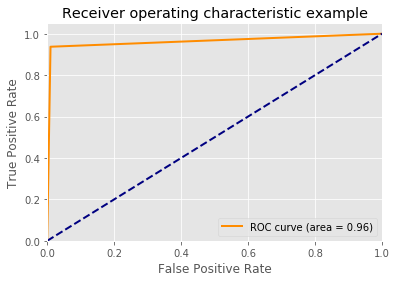

In [356]:
from sklearn.metrics import roc_curve, auc
#
#Compute ROC curve and ROC area for each class


#fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
roc_auc = auc(fpr, tpr)

#Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_test_predict.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ConfMatrix

In [292]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6796   68]
 [  40  596]]


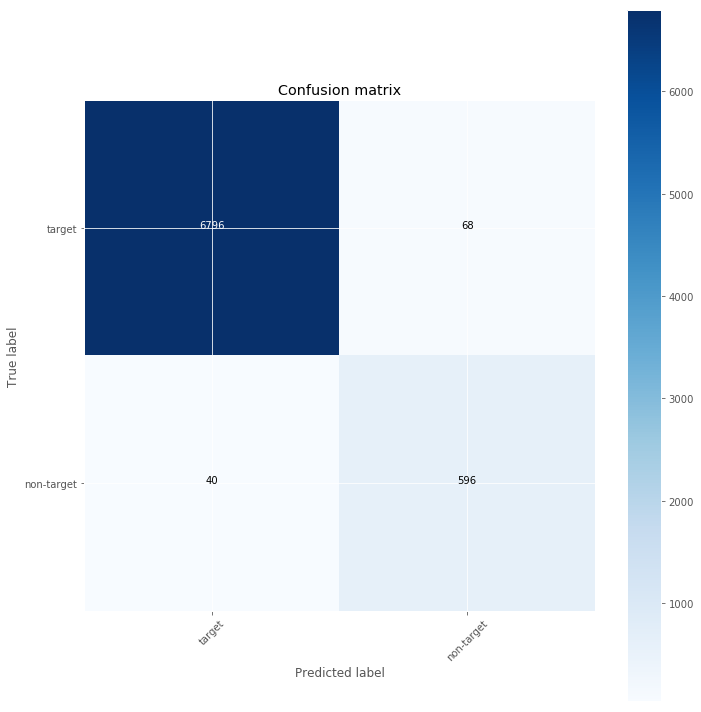

In [301]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cfm, classes=['target', 'non-target'], title='Confusion matrix', normalize=False)

## kNN GridSearch CV

In [255]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array}, scoring ='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

CPU times: user 6.36 s, sys: 1.22 s, total: 7.58 s
Wall time: 1h 1min 51s


In [256]:
print (best_cv_err, best_n_neighbors)

0.08726896177 7


### kNN с оптимальными параметрами

In [316]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_train_best = knn.predict(X_train)
knn_test_best = knn.predict(X_test)

In [317]:
print(np.mean(y_train != knn_train_best), (np.mean(y_test  != knn_test_best)))

0.0119428571429 0.014


In [323]:
roc_auc_score(y_test, knn_test_best)

0.96096533183797328

In [357]:
roc_curve(y_test, knn_test_best)

(array([ 0.        ,  0.00888695,  1.        ]),
 array([ 0.        ,  0.93081761,  1.        ]),
 array([2, 1, 0]))

# Random Forest

In [261]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

rf_train_predict = rf.predict(X_train)
rf_test_predict = rf.predict(X_test)

rf_err_train = np.mean(y_train != rf_train_predict)
rf_err_test  = np.mean(y_test  != rf_test_predict)
print ('Error: ',rf_err_train, rf_err_test)

0.0 0.00293333333333


In [358]:
print('ROC-AUC: ',roc_auc_score(y_test, rf_test_predict))

ROC-AUC:  0.992690878304


### n_estimators =150

In [367]:

rf = ensemble.RandomForestClassifier(n_estimators=150, random_state=11)
rf.fit(X_train, y_train)

rf150_train_predict = rf.predict(X_train)
rf150_test_predict = rf.predict(X_test)

rf150_err_train = np.mean(y_train != rf150_train_predict)
rf150_err_test  = np.mean(y_test  != rf150_test_predict)
print ('Error: ', rf150_err_train, rf150_err_test)

print('ROC-AUC: ',roc_auc_score(y_test, rf150_test_predict))

Error:  0.0 0.00293333333333
ROC-AUC:  0.991977558605


### n_estimators =200

In [369]:
rf = ensemble.RandomForestClassifier(n_estimators=200, random_state=11)
rf.fit(X_train, y_train)

rf200_train_predict = rf.predict(X_train)
rf200_test_predict = rf.predict(X_test)

rf200_err_train = np.mean(y_train != rf200_train_predict)
rf200_err_test  = np.mean(y_test  != rf200_test_predict)
print ('Error: ', rf200_err_train, rf200_err_test)

print('ROC-AUC: ',roc_auc_score(y_test, rf200_test_predict))

Error:  0.0 0.00306666666667
ROC-AUC:  0.991904714782


### Оценим значимость признаков для RF

In [262]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'relation_0' (0.1026)
 2. feature 'coded_zodiac_sign_0' (0.0929)
 3. feature 'coded_occupation_type_0' (0.0821)
 4. feature 'relation_7' (0.0387)
 5. feature 'coded_relatives/type_0' (0.0329)
 6. feature 'coded_occupation_type_2' (0.0300)
 7. feature 'coded_ed_form_0' (0.0280)
 8. feature 'schools/0/country_0' (0.0255)
 9. feature 'coded_occupation_type_3' (0.0254)
10. feature 'relation_4' (0.0238)
11. feature 'relation_2' (0.0211)
12. feature 'coded_ed_form_1' (0.0210)
13. feature 'coded_ed_status_0' (0.0180)
14. feature 'age  ' (0.0171)
15. feature 'personal/alcohol_0' (0.0169)
16. feature 'coded_relatives/type_1' (0.0163)
17. feature 'followers_count' (0.0158)
18. feature 'personal/smoking_0' (0.0141)
19. feature 'personal/people_main_0' (0.0123)
20. feature 'personal/people_main_2' (0.0121)
21. feature 'universities/0/country_0' (0.0107)
22. feature 'schools/0/country_1' (0.0105)
23. feature 'carreer/0/country_id_0' (0.0101)
24. feature 'personal/po

1221. feature 'city/id_1914789' (0.0000)
1222. feature 'city/id_213' (0.0000)
1223. feature 'city/id_307' (0.0000)
1224. feature 'city/id_1950532' (0.0000)
1225. feature 'city/id_5267806' (0.0000)
1226. feature 'city/id_5267827' (0.0000)
1227. feature 'city/id_5309092' (0.0000)
1228. feature 'city/id_5326979' (0.0000)
1229. feature 'universities/0/country_81' (0.0000)
1230. feature 'city/id_5330221' (0.0000)
1231. feature 'universities/0/country_85' (0.0000)
1232. feature 'city/id_5346900' (0.0000)
1233. feature 'city/id_5372032' (0.0000)
1234. feature 'city/id_29' (0.0000)
1235. feature 'city/id_28' (0.0000)
1236. feature 'city/id_5396637' (0.0000)
1237. feature 'city/id_5398717' (0.0000)
1238. feature 'city/id_5420846' (0.0000)
1239. feature 'city/id_5421165' (0.0000)
1240. feature 'city/id_5422710' (0.0000)
1241. feature 'city/id_5470540' (0.0000)
1242. feature 'country/id_190' (0.0000)
1243. feature 'city/id_16' (0.0000)
1244. feature 'universities/0/country_95' (0.0000)
1245. feat

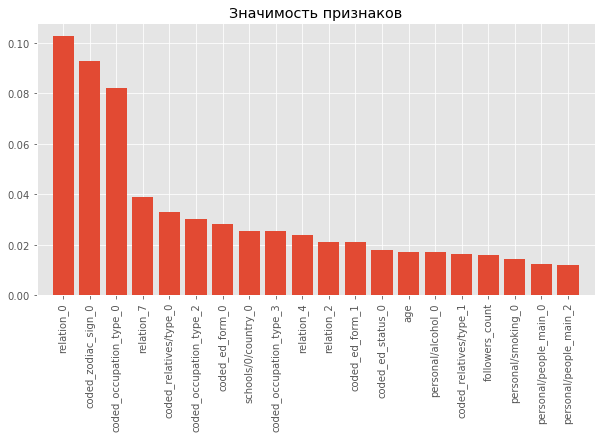

In [263]:
d_first = 20
plt.figure(figsize=(10, 5))
plt.title("Значимость признаков")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

# SVM

### Со стандартными параметрами

In [370]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

svc_train_result = svc.predict(X_train)
svc_test_result = svc.predict(X_test)

err_train = np.mean(y_train != svc_train_result)
err_test  = np.mean(y_test  != svc_test_result)
print (err_train, err_test)

0.0132 0.0126666666667


In [371]:
print('ROC-AUC: ',roc_auc_score(y_test, svc_test_result))

ROC-AUC:  0.939580859392


## SVM кросс-валидация

In [ ]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-3, 3, num=5)
gamma_array = np.logspace(-5, 2, num=6)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array}, n_jobs=-1)
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)



## Получаем доп. признаки из api vk.com

In [ ]:
#import json
#from time import sleep;
#
#user_ids = list(df['id'].astype(int))
#def get_counters (vkapi, user_ids):
#    counters = pd.DataFrame();
#    for id in user_ids:
#        response = vkapi.users.get(user_ids=id, fields = 'counters')
#        response = json.dumps(response)
#        df = pd.read_json(path_or_buf = response, orient='records', encoding='utf-8', typ='frame')
#        del(response)
#        counters = pd.concat([counters, df], ignore_index=True)
#        print(id)
#        sleep(0.33)
#    return counters;

In [ ]:
#%time
#countrs = get_counters(vkapi, user_ids);